In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

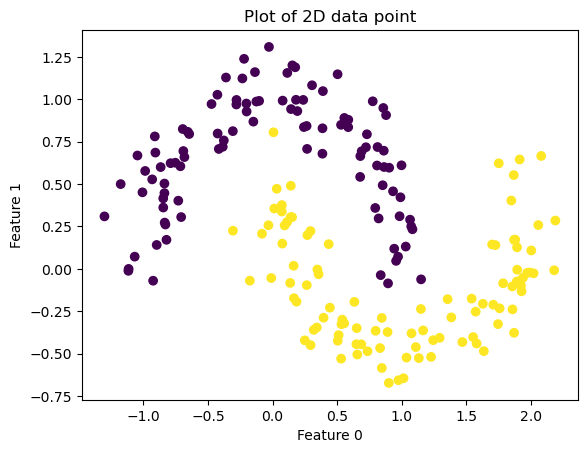

In [2]:
# Creating a binary classification dataset:

from sklearn.datasets import make_moons

x, y = make_moons(n_samples = 200, noise = 0.13, random_state = 42)

plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Plot of 2D data point')
plt.show()

In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

---
# Case 1: All the parameters are intialized as 0
---
## ReLU Activation Function

In [4]:
model = Sequential()

model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Let's see what keras has initialized values of weights or bias

model.get_weights()

[array([[-0.06361735, -0.62702954,  0.784647  ],
        [-0.75009024, -0.11306685, -0.81340253]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.5218468 , -0.38516927, -0.04474688],
        [ 0.797451  ,  0.64564633,  0.01068234],
        [-0.21823597,  0.18320131, -0.9202335 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.33695328],
        [-0.5064508 ],
        [ 0.44703865]], dtype=float32),
 array([0.], dtype=float32)]

In [6]:
# Setting initial parameters of model as 0

initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)         # Only weights are initialized some values, bias are already zero in this case, so we
initial_weights[2] = np.zeros(model.get_weights()[2].shape)         # only change weights of the layers. 
initial_weights[4] = np.zeros(model.get_weights()[4].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history = model.fit(x, y, epochs = 100, validation_split = 0.2, verbose = False)

In [9]:
# Let's see the weights after training the model

model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.04039275], dtype=float32)]

#### As seen the weights and bias have not updated even after 100 epochs. So using ReLU activation function when parameters are initialzed as 0, results in no update of the parameters.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step


<Axes: >

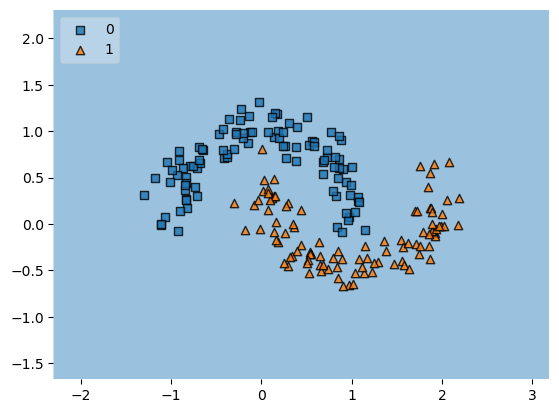

In [10]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

---
## Tanh Activation Function

In [11]:
model = Sequential()

model.add(Dense(3, activation = 'tanh', input_dim = 2))
model.add(Dense(3, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Let's see what keras has initialized values of weights or bias

model.get_weights()

[array([[-0.07182717, -0.8215264 , -0.38260126],
        [-0.64780384, -0.94867   , -1.0561612 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.36143208, -0.2080462 ,  0.11472058],
        [-0.5718343 ,  0.12018824, -0.50807405],
        [ 0.2898469 ,  0.66514874,  0.69104695]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.08443379],
        [-1.1694789 ],
        [-0.5929085 ]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
# Setting initial parameters of model as 0

initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)         # Only weights are initialized some values, bias are already zero in this case, so we
initial_weights[2] = np.zeros(model.get_weights()[2].shape)         # only change weights of the layers. 
initial_weights[4] = np.zeros(model.get_weights()[4].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x, y, epochs = 100, validation_split = 0.2, verbose = False)

# Let's see the weights after training the model
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.04171069], dtype=float32)]

#### Problem with ReLU and Tanh Activations: If all weights are zero, the activations (outputs) of all neurons in a layer will be zero (for ReLU) or equal (for Tanh, point five). During backpropagation, the derivatives used to update weights will also become zero. This means no weight updates will occur, and the network will not train effectively, remaining stuck with zero weights

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step


<Axes: >

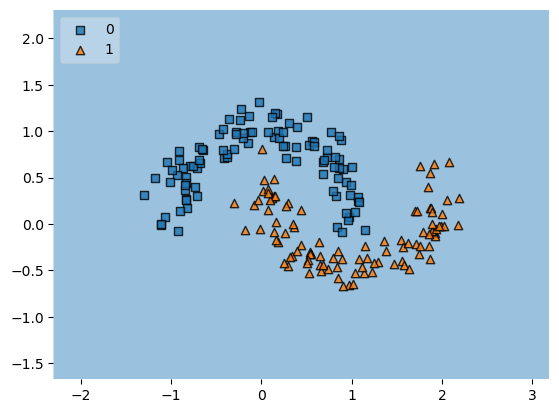

In [15]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

---
## Sigmoid Activation Function

In [16]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 2))
model.add(Dense(3, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Let's see what keras has initialized values of weights or bias

model.get_weights()

[array([[ 0.98332834,  0.44281483,  0.47779918],
        [-0.73830473,  0.19268382,  0.5661652 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.01601243, -0.19177341,  0.9392412 ],
        [ 0.5152297 ,  0.19816113,  0.24993014],
        [-0.77795196, -0.43857217, -0.8805988 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.9122311 ],
        [ 0.7517967 ],
        [-0.21405959]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
# Setting initial parameters of model as 0

initial_weights = model.get_weights()

initial_weights[0] = np.zeros(model.get_weights()[0].shape)         # Only weights are initialized some values, bias are already zero in this case, so we
initial_weights[2] = np.zeros(model.get_weights()[2].shape)         # only change weights of the layers. 
initial_weights[4] = np.zeros(model.get_weights()[4].shape)

model.set_weights(initial_weights)

model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x, y, epochs = 100, validation_split = 0.2, verbose = False)

# Let's see the weights after training the model
model.get_weights()

[array([[-0.9163296 , -0.9163296 , -0.9163296 ],
        [ 0.95846546,  0.95846546,  0.95846546]], dtype=float32),
 array([-0.01808451, -0.01808451, -0.01808451], dtype=float32),
 array([[0.502253, 0.502253, 0.502253],
        [0.502253, 0.502253, 0.502253],
        [0.502253, 0.502253, 0.502253]], dtype=float32),
 array([-0.10385082, -0.10385082, -0.10385082], dtype=float32),
 array([[-0.07163005],
        [-0.07163005],
        [-0.07163005]], dtype=float32),
 array([0.00713116], dtype=float32)]

#### Nonlinearity can not be captured- one layer(no matter how many neurons in it) behaves as one perceptron/node. 
#### Problem with Sigmoid Activations: While Sigmoid activations won't be zero (they'll be 0.5), they will all be equal for all neurons in a layer. This equality means that all weights connected to a specific input will receive the same updates, causing them to always have the same value. Effectively, all neurons in that layer behave as a single neuron, preventing the network from learning non-linearity and behaving like a simple linear model (a perceptron).

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

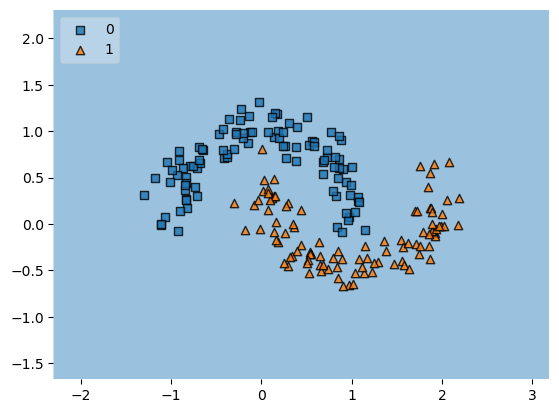

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

---
# Case 2: Non-zero constant value
##### We can take any constant value for all parameters initially, like 0.5, 1, 13, etc.
#### This method leads to the exact same issue as zero initialization with the sigmoid function. All neurons in a given layer will produce identical activations for identical inputs because their weights are the same. Consequently, their derivatives will also be identical, causing them to update by the same amount. This again forces multiple neurons to behave as a single neuron, resulting in a model that can only capture linear relationships, even with non-linear activation functions like ReLU, Tanh, or Sigmoid
---
## ReLU Activation Function

In [21]:
model = Sequential()

model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Let's see what keras has initialized values of weights or bias

model.get_weights()

[array([[ 0.41780782, -1.0013196 , -0.8481009 ],
        [-0.78091246,  0.17591822,  0.3142799 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.54385734,  0.27739954, -0.11345673],
        [ 0.42310667, -0.97663426, -0.72936726],
        [-0.5448899 ,  0.05067015,  0.9601548 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.94145715],
        [ 1.0684777 ],
        [-0.04433966]], dtype=float32),
 array([0.], dtype=float32)]

In [23]:
# Setting initial parameters of model as 31

initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*31
initial_weights[1] = np.ones(model.get_weights()[1].shape)*31     
initial_weights[2] = np.ones(model.get_weights()[2].shape)*31
initial_weights[3] = np.ones(model.get_weights()[3].shape)*31     
initial_weights[4] = np.ones(model.get_weights()[4].shape)*31
initial_weights[5] = np.ones(model.get_weights()[5].shape)*31     

model.set_weights(initial_weights)

model.get_weights()

[array([[31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31., 31., 31.],
        [31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31.],
        [31.],
        [31.]], dtype=float32),
 array([31.], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x, y, epochs = 100, validation_split = 0.2, verbose = False)

# Let's see the weights after training the model
model.get_weights()

[array([[30.775908, 30.775908, 30.775908],
        [30.511698, 30.511698, 30.511698]], dtype=float32),
 array([30.512691, 30.512691, 30.512691], dtype=float32),
 array([[30.511047, 30.511047, 30.511047],
        [30.511047, 30.511047, 30.511047],
        [30.511047, 30.511047, 30.511047]], dtype=float32),
 array([30.507607, 30.507607, 30.507607], dtype=float32),
 array([[30.511019],
        [30.511019],
        [30.511019]], dtype=float32),
 array([30.505882], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

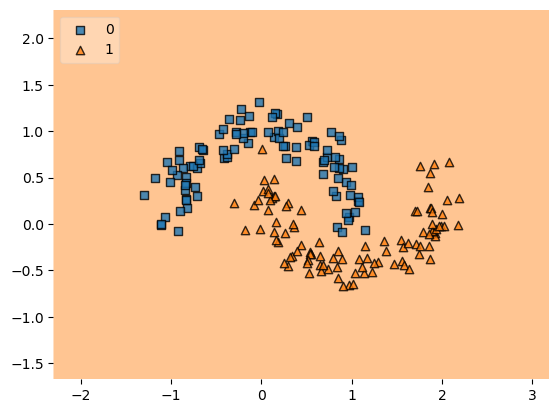

In [25]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

---
## Tanh Activation Function

In [26]:
model = Sequential()

model.add(Dense(3, activation = 'tanh', input_dim = 2))
model.add(Dense(3, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

# Let's see what Keras has initialized values of weights or bias
model.get_weights()

[array([[ 0.327564  ,  1.0613208 , -0.556461  ],
        [ 0.32514834, -0.12123483,  0.12777364]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.9898331 , -0.31128478, -0.05383778],
        [-0.44467115, -0.0231297 , -0.3083403 ],
        [-0.9245546 ,  0.05135107,  0.6994684 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.08271194],
        [-0.39252597],
        [ 0.53807116]], dtype=float32),
 array([0.], dtype=float32)]

In [27]:
# Setting initial parameters of model as 31

initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*31
initial_weights[1] = np.ones(model.get_weights()[1].shape)*31     
initial_weights[2] = np.ones(model.get_weights()[2].shape)*31
initial_weights[3] = np.ones(model.get_weights()[3].shape)*31     
initial_weights[4] = np.ones(model.get_weights()[4].shape)*31
initial_weights[5] = np.ones(model.get_weights()[5].shape)*31     

model.set_weights(initial_weights)

model.get_weights()

[array([[31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31., 31., 31.],
        [31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31.],
        [31.],
        [31.]], dtype=float32),
 array([31.], dtype=float32)]

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x, y, epochs = 100, validation_split = 0.2, verbose = False)

# Let's see the weights after training the model
model.get_weights()

[array([[31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31., 31., 31.],
        [31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[30.505657],
        [30.505657],
        [30.505657]], dtype=float32),
 array([30.505657], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step


<Axes: >

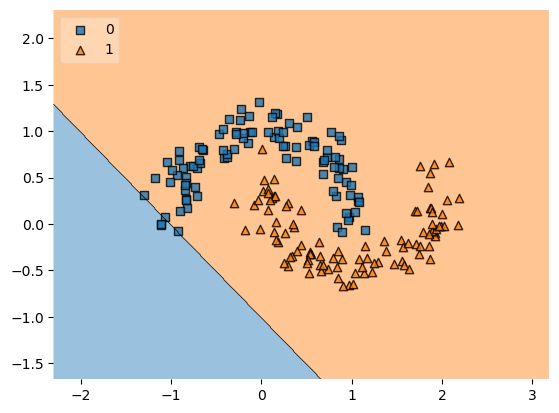

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

---
## Sigmoid Activation Function

In [30]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 2))
model.add(Dense(3, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

# Let's see what Keras has initialized values of weights or bias
model.get_weights()

[array([[-1.044397  ,  0.4422258 ,  0.72995734],
        [ 0.19047427, -0.21811175, -0.6251161 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.36682868,  0.4032719 ,  0.8060858 ],
        [ 0.3719437 ,  0.95122385, -0.25570655],
        [ 0.6378579 ,  0.15694737,  0.10304213]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.53600985],
        [ 0.7838906 ],
        [-0.90572226]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
# Setting initial parameters of model as 31

initial_weights = model.get_weights()

initial_weights[0] = np.ones(model.get_weights()[0].shape)*31
initial_weights[1] = np.ones(model.get_weights()[1].shape)*31     
initial_weights[2] = np.ones(model.get_weights()[2].shape)*31
initial_weights[3] = np.ones(model.get_weights()[3].shape)*31     
initial_weights[4] = np.ones(model.get_weights()[4].shape)*31
initial_weights[5] = np.ones(model.get_weights()[5].shape)*31     

model.set_weights(initial_weights)

model.get_weights()

[array([[31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31., 31., 31.],
        [31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31.],
        [31.],
        [31.]], dtype=float32),
 array([31.], dtype=float32)]

In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(x, y, epochs = 100, validation_split = 0.2, verbose = False)

# Let's see the weights after training the model
model.get_weights()

[array([[31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[31., 31., 31.],
        [31., 31., 31.],
        [31., 31., 31.]], dtype=float32),
 array([31., 31., 31.], dtype=float32),
 array([[30.50529],
        [30.50529],
        [30.50529]], dtype=float32),
 array([30.50529], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step


<Axes: >

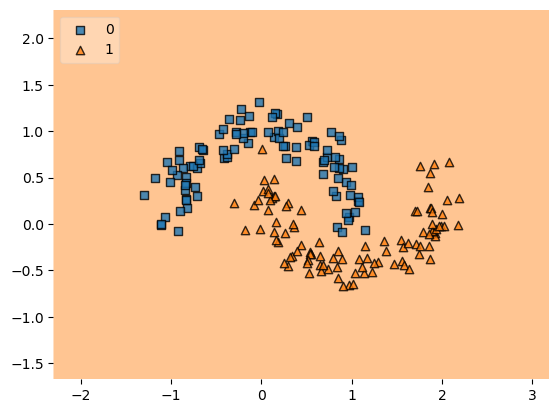

In [33]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf = model, legend=2)

---
# Case 3: Random Weight Initialization

Initializing weights with zero or any non-zero constant value is problematic because it prevents neurons in a layer from learning distinct features, making them behave like a single neuron and limiting the model to linear relationships. Therefore, the only remaining option for initialization is to use random values.

---
## • Small Random Initialization: 
Initializing weights with very small random values (e.g., numbers between -0.01 and 0.01).

---

## 1. For Tanh Activation Function:
    ◦ Small Inputs to Activation Function: When input values (X) are multiplied by these very small initial weights (W), the resulting sum (Z = Σ(W*X)) passed to the activation function for each neuron will also be a very small number, often close to zero.
    ◦ Output Near Zero: For the Tanh function, its graph shows that when the input (Z) is very close to zero, the output of Tanh is also very close to zero. This means that the activations of most neurons in all hidden layers will be very close to zero.
    ◦ Vanishing Gradients: During backpropagation, the gradient (derivative) of the Tanh function when its input is near zero is also very small. As these already small derivatives are multiplied across multiple layers (due to the chain rule in backpropagation), the gradients become progressively smaller and smaller, approaching zero.
    ◦ No Weight Updates: This phenomenon is known as the vanishing gradient problem. It means that the weight updates (ΔW = -learning_rate * gradient) will be negligible or non-existent. Consequently, the weights will hardly change during training, and the network will fail to learn effectively.
---
## 2. For Sigmoid Activation Function:
    ◦ Similar to Tanh, small random weights can also lead to the vanishing gradient problem for Sigmoid activations, especially in deep neural networks.
    ◦ This results in very slow training or even no training at all.
---
## 3. For ReLU Activation Function:
    ◦ ReLU (Rectified Linear Unit) behaves differently from Tanh and Sigmoid because it does not saturate in the positive direction (its derivative is 1 for positive inputs). Therefore, it is less prone to the vanishing gradient problem in the same manner.
    ◦ However, when weights are initialized with very small random values, it still leads to extremely slow training and convergence.
    ◦ The network will take an excessively long time (thousands of epochs) to show any significant improvement in performance.
---
## Summary of Problems with Small Random Initialization: 
    Using very small random values for weight initialization can cause:
    • The Vanishing Gradient Problem when using Tanh or Sigmoid activation functions.
    • Extremely Slow Convergence when using ReLU activation functions, requiring a huge number of epochs to achieve meaningful learning.
This effectively cripples the training process, either by stopping weight updates altogether or by making them incredibly inefficient.

---

## • Large Random Initialization:
---
## 1. For Tanh and Sigmoid Activation Functions:
    ◦ Large Inputs to Activation Function (Z values): When input values (X) are multiplied by these large initial weights (W), and then summed up (Z = Σ(W*X)), the resulting Z values passed to the activation function for each neuron become quite large. They can range up to hundreds or thousands.
    ◦ Saturation: For both Tanh and Sigmoid activation functions, if their input (Z) is very large (either positive or negative), the output of the activation function saturates. This means the output gets pushed to its extreme maximum or minimum value (e.g., close to 1 or -1 for Tanh; close to 1 or 0 for Sigmoid). 
    ◦ Slow Training / Vanishing Gradients: In these saturated regions, the derivative of the activation function becomes very close to zero. During backpropagation, as these very small derivatives are multiplied across multiple layers, the gradients become progressively smaller. This leads to slow training or slow convergence, and in the worst-case scenario, the vanishing gradient problem can occur, meaning weight updates are negligible or non-existent.
---
## 2. For ReLU Activation Function:
    ◦ Large Outputs and Gradients: ReLU (Rectified Linear Unit) is different from Tanh and Sigmoid because it is not a saturating function in the positive direction. If the sums (Z values) are large and positive, ReLU's output will also be large, as there is no upper bound.
    ◦ Unstable Training: If the output of ReLU is large, this results in very large gradients during backpropagation. When the optimization algorithm (like gradient descent) uses these large gradients to update the weights, it takes very large steps in the weight space. This makes the training process unstable, and the network might repeatedly overshoot the optimal solution, failing to converge or reaching an optimal solution. The video's demonstration highlights this instability, showing that training might not reach the correct result.
---
## Summary of Problems with Large Random Initialization: 
    Using large random values for weight initialization can cause:
    • Saturation for Tanh and Sigmoid activation functions, leading to slow training or vanishing gradients.
    • Unstable training and potentially non-convergence for ReLU activation functions due to very large gradients.
    In essence, whether your network uses Tanh/Sigmoid or ReLU, initializing weights with large random values prevents the network from training effectively, either by making it too slow and stuck or by making it too erratic to find a stable solution.
    To put it in perspective, imagine trying to fine-tune a delicate instrument.
    • If you make very large adjustments (analogous to large weight updates from large gradients), you'll constantly overshoot the mark, making it impossible to precisely tune the instrument (unstable training, non-convergence for ReLU).

---